In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.reset_default_graph()

In [3]:
num_samples, w, b = 20, 0.5, 2

In [4]:
xs = np.asarray(range(num_samples))
ys = np.asarray([x*w + b + np.random.normal() for x in range(num_samples)])

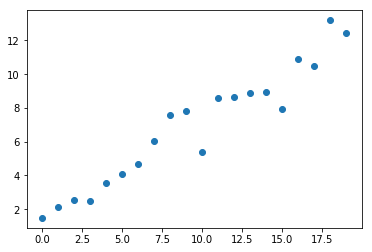

In [5]:
plt.scatter(xs, ys);

In [6]:
class Linear(object):
    def __init__(self):
        self.w = tf.get_variable("w", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())
        self.b = tf.get_variable("b", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())
    
    
    def __call__(self, x):
        return self.w*x + self.b

In [7]:
xtf = tf.placeholder(tf.float32, [num_samples], "xs")
ytf = tf.placeholder(tf.float32, [num_samples], "ys")

model = Linear()
model_output = model(xtf)

In [8]:
cov = tf.reduce_sum((xtf - tf.reduce_mean(xtf))*(ytf - tf.reduce_mean(ytf)))
var = tf.reduce_sum(tf.square(xtf-tf.reduce_mean(xtf)))

w_hat= cov/var
b_hat = tf.reduce_mean(ytf) - w_hat*tf.reduce_mean(xtf)

solve_w = model.w.assign(w_hat)
solve_b = model.b.assign(tf.reduce_mean(ytf) - w_hat*tf.reduce_mean(xtf))

In [9]:
with tf.train.MonitoredSession() as sess:
    sess.run(
        [solve_w, solve_b],
        feed_dict={xtf: xs, ytf: ys}
    )
    preds = sess.run(
                model_output,
                feed_dict={xtf: xs, ytf: ys}
    )

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


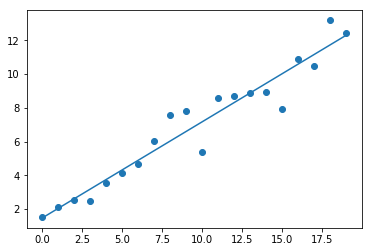

In [10]:
plt.scatter(xs, ys);
plt.plot(xs, preds);